<a href="https://colab.research.google.com/github/Saher-Amasha/object_detection_using_ONENET/blob/main/saher_amasha_207607136_safa_amasha_211941943hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/PeizeSun/OneNet.git

Cloning into 'OneNet'...
remote: Enumerating objects: 677, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 677 (delta 48), reused 48 (delta 48), pack-reused 625
Receiving objects: 100% (677/677), 1.53 MiB | 16.10 MiB/s, done.
Resolving deltas: 100% (185/185), done.


In [ ]:
%cd OneNet

/content/OneNet


In [ ]:
!pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 torchaudio===0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 735.4 MB 15 kB/s 
     |████████████████████████████████| 12.8 MB 20.2 MB/s 
     |████████████████████████████████| 7.6 MB 5.1 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.11.0+cu113
    Uninstalling torch-1.11.0+cu113:
      Successfully uninstalled torch-1.11.0+cu113
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.12.0+cu113
    Uninstalling torchvision-0.12.0+cu113:
      Successfully uninstalled torchvision-0.12.0+cu113
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 0.11.0+cu113
    Uninstalling torchaudio-0.11.0+cu113:
      Successfully uninstalled torchaudio-0.11.0+cu113
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.12.0 requires torch

In [ ]:
!pip install pyyaml==5.1 pycocotools>=2.0.1

In [ ]:
!python setup.py build develop

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
running build
running build_py
creating build
creating build/lib.linux-x86_64-3.7
creating build/lib.linux-x86_64-3.7/detectron2
copying detectron2/__init__.py -> build/lib.linux-x86_64-3.7/detectron2
creating build/lib.linux-x86_64-3.7/detectron2/solver
copying detectron2/solver/lr_scheduler.py -> build/lib.linux-x86_64-3.7/detectron2/solver
copying detectron2/solver/build.py -> build/lib.linux-x86_64-3.7/detectron2/solver
copying detectron2/solver/__init__.py -> build/lib.linux-x86_64-3.7/detectron2/solver
creating build/lib.linux-x86_64-3.7/detectron2/config
copying detectron2/config/compat.py -> build/lib.linux-x86_64-3.7/detectron2/config
copying detectron2/config/config.py -> build/lib.linux-x86_64-3.7/detectron2/config
copying detectron2/config/defaults.py -> build/lib.linux-x86_64-3.7/detectron2/config
copying detectron2/config/__init__.py -> build/lib.linux-x86_64-3.7/detectron2/config
creating build/lib.linux-x86_64-

In [ ]:
%%bash
# COCO 2017 dataset http://cocodataset.org
# Download command: bash data/scripts/get_coco.sh
# Train command: python train.py --data coco.yaml
# Default dataset location is next to /yolov5:
#   /parent_folder
#     /coco
#     /yolov5

# Download/unzip labels
d='../' # unzip directory
url=https://github.com/ultralytics/yolov5/releases/download/v1.0/
f='coco2017labels.zip'                                                                 # 68 MB
echo 'Downloading' $url$f ' ...' && curl -L $url$f -o $f && unzip -q $f -d $d && rm $f # download, unzip, remove

# Download/unzip images
d='../coco/images' # unzip directory
url=http://images.cocodataset.org/zips/
f1='train2017.zip' # 19G, 118k images
f2='val2017.zip'   # 1G, 5k images
f3='test2017.zip'  # 7G, 41k images (optional)
for f in $f1 $f2; do
  echo 'Downloading' $url$f ' ...' && curl -L $url$f -o $f && unzip -q $f -d $d && rm $f # download, unzip, remove
done

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   657  100   657    0     0   4977      0 --:--:-- --:--:-- --:--:--  4977
100 67.7M  100 67.7M    0     0  72.1M      0 --:--:-- --:--:-- --:--:--     0
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 18.0G  100 18.0G    0     0  37.0M      0  0:08:17  0:08:17 --:--:-- 61.9M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  777M  100  777M    0     0  78.1M      0  0:00:09  0:00:09 --:--:-- 70.5M


In [ ]:
%%bash
cd ../coco
wget -c http://images.cocodataset.org/annotations/annotations_trainval2017.zip
# wget -c http://images.cocodataset.org/annotations/stuff_annotations_trainval2017.zip
# wget -c http://images.cocodataset.org/annotations/image_info_test2017.zip
# wget -c http://images.cocodataset.org/annotations/image_info_unlabeled2017.zip

unzip annotations_trainval2017.zip
# unzip stuff_annotations_trainval2017.zip
# unzip image_info_test2017.zip
# unzip image_info_unlabeled2017.zip

rm annotations_trainval2017.zip
# rm stuff_annotations_trainval2017.zip
# rm image_info_test2017.zip
# rm image_info_unlabeled2017.zip

Archive:  annotations_trainval2017.zip
  inflating: annotations/instances_train2017.json  
  inflating: 17.zip                  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  


--2022-04-28 21:51:12--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.169.25
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.169.25|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

     0K .......... .......... .......... .......... ..........  0%  903K 4m34s
    50K .......... .......... .......... .......... ..........  0% 2.64M 3m2s
   100K .......... .......... .......... .......... ..........  0%  121M 2m2s
   150K .......... .......... .......... .......... ..........  0% 2.68M 1m54s
   200K .......... .......... .......... .......... ..........  0%  163M 92s
   250K .......... .......... .......... .......... ..........  0%  223M 77s
   300K .......... .......... .......... .......... ..........  0% 2.71M 78s
   350K .......... .......... .......... .......... .....

In [ ]:
!pip install -U iopath

In [ ]:
!pwd

In [ ]:
!mkdir -p datasets/coco
!ln -s /content/coco/annotations datasets/coco/annotations
!ln -s /content/coco/images/train2017 datasets/coco/train2017
!ln -s /content/coco/images/val2017 datasets/coco/val2017

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
!python projects/OneNet/train_net.py   --num-gpus 1 \
    --config-file projects/OneNet/configs/onenet.res50.dcn.yaml  SOLVER.IMS_PER_BATCH 5 SOLVER.BASE_LR 0.0025 SOLVER.MAX_ITER 10000 SOLVER.STEPS "(480000, 640000)"  

Command Line Args: Namespace(config_file='projects/OneNet/configs/onenet.res50.dcn.yaml', dist_url='tcp://127.0.0.1:49152', eval_only=False, machine_rank=0, num_gpus=1, num_machines=1, opts=['SOLVER.IMS_PER_BATCH', '5', 'SOLVER.BASE_LR', '0.0025', 'SOLVER.MAX_ITER', '10000', 'SOLVER.STEPS', '(480000, 640000)'], resume=False)
[04/28 23:29:11 detectron2]: Rank of current process: 0. World size: 1
[04/28 23:29:12 detectron2]: Environment info:
----------------------  ---------------------------------------------------------------
sys.platform            linux
Python                  3.7.13 (default, Apr 24 2022, 01:04:09) [GCC 7.5.0]
numpy                   1.21.6
detectron2              0.3 @/content/OneNet/detectron2
Compiler                GCC 7.5
CUDA compiler           CUDA 11.1
detectron2 arch flags   7.5
DETECTRON2_ENV_MODULE   <not set>
PyTorch                 1.7.1+cu101 @/usr/local/lib/python3.7/dist-packages/torch
PyTorch debug build     False
GPU available           True
GPU 0

In [ ]:
!python projects/OneNet/train_net.py --num-gpus 1 \
    --config-file projects/OneNet/configs/onenet.res50.dcn.yaml \
    --eval-only MODEL.WEIGHTS /content/OneNet/output_onenet_r50dcn/model_final.pth

Command Line Args: Namespace(config_file='projects/OneNet/configs/onenet.res50.dcn.yaml', dist_url='tcp://127.0.0.1:49152', eval_only=True, machine_rank=0, num_gpus=1, num_machines=1, opts=['MODEL.WEIGHTS', '/content/OneNet/output_onenet_r50dcn/model_final.pth'], resume=False)
[04/29 01:20:22 detectron2]: Rank of current process: 0. World size: 1
[04/29 01:20:23 detectron2]: Environment info:
----------------------  ---------------------------------------------------------------
sys.platform            linux
Python                  3.7.13 (default, Apr 24 2022, 01:04:09) [GCC 7.5.0]
numpy                   1.21.6
detectron2              0.3 @/content/OneNet/detectron2
Compiler                GCC 7.5
CUDA compiler           CUDA 11.1
detectron2 arch flags   7.5
DETECTRON2_ENV_MODULE   <not set>
PyTorch                 1.7.1+cu101 @/usr/local/lib/python3.7/dist-packages/torch
PyTorch debug build     False
GPU available           True
GPU 0                   Tesla T4 (arch=7.5)
CUDA_HOME 

In [ ]:
import urllib.request
f = open('example1.jpg','wb')
f.write(urllib.request.urlopen('https://spca.co.il/wp-content/uploads/2021/11/dog.jpeg').read())
f.close()

In [ ]:
%%bash
python demo/demo.py\
    --config-file projects/OneNet/configs/onenet.res50.dcn.yaml \
    --input /content/OneNet/example1.jpg --output /content/example1.jpg --confidence-threshold 0.2 \
    --opts MODEL.WEIGHTS /content/OneNet/output_onenet_r50dcn/model_final.pth

[04/29 01:35:30 detectron2]: Arguments: Namespace(confidence_threshold=0.2, config_file='projects/OneNet/configs/onenet.res50.dcn.yaml', input=['/content/OneNet/example1.jpg'], opts=['MODEL.WEIGHTS', '/content/OneNet/output_onenet_r50dcn/model_final.pth'], output='/content/example1.jpg', video_input=None, webcam=False)
[04/29 01:35:34 fvcore.common.checkpoint]: [Checkpointer] Loading from /content/OneNet/output_onenet_r50dcn/model_final.pth ...
[04/29 01:35:34 detectron2]: /content/OneNet/example1.jpg: detected 1 instances in 0.13s


100%|██████████| 1/1 [00:00<00:00,  3.68it/s]


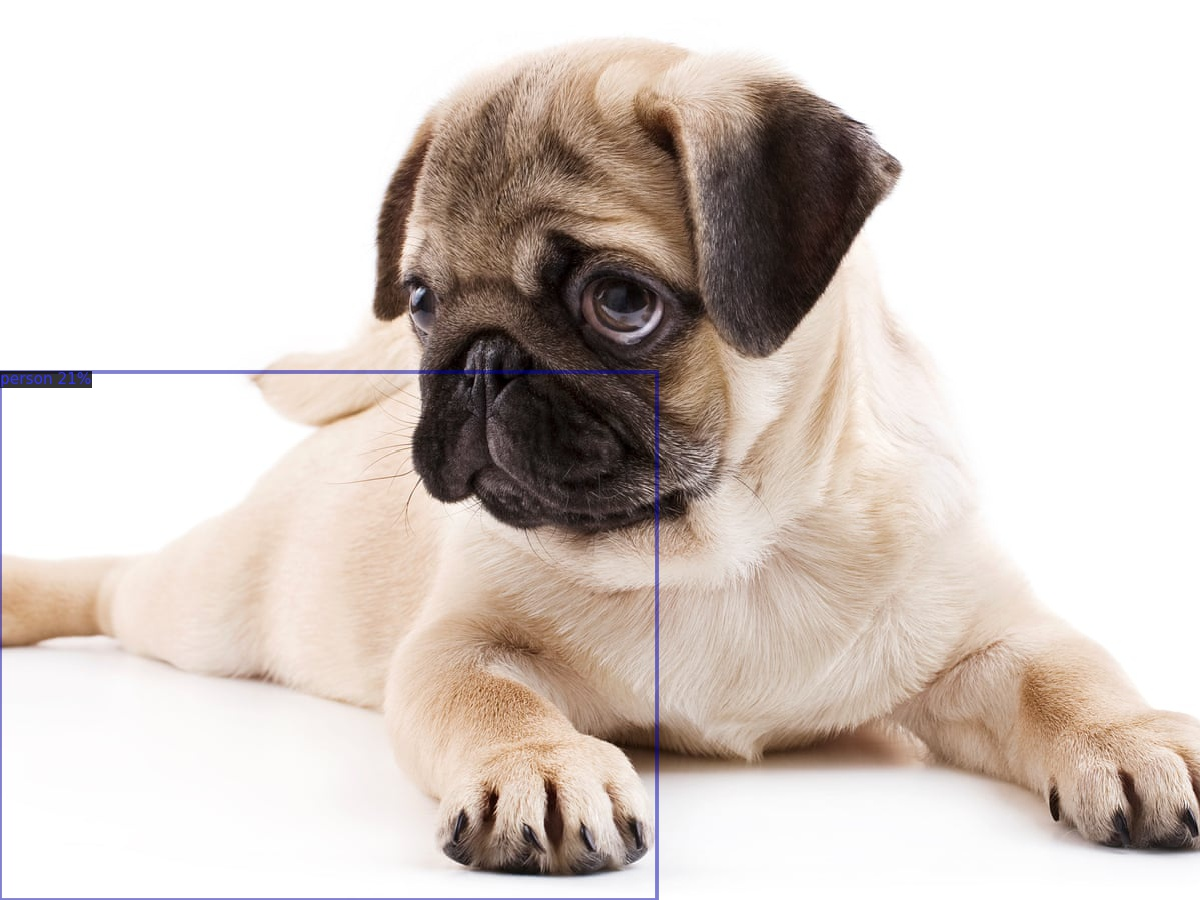

In [ ]:
from IPython.display import Image, display
display(Image('/content/example1.jpg'))

In [ ]:
%%bash
python demo/demo.py\
    --config-file projects/OneNet/configs/onenet.res50.dcn.yaml \
    --input /content/coco/images/train2017/000000001700.jpg --output /content/example1.jpg --confidence-threshold 0.16 \
    --opts MODEL.WEIGHTS /content/OneNet/output_onenet_r50dcn/model_0009999.pth

[04/29 01:47:26 detectron2]: Arguments: Namespace(confidence_threshold=0.16, config_file='projects/OneNet/configs/onenet.res50.dcn.yaml', input=['/content/coco/images/train2017/000000001700.jpg'], opts=['MODEL.WEIGHTS', '/content/OneNet/output_onenet_r50dcn/model_0009999.pth'], output='/content/example1.jpg', video_input=None, webcam=False)
[04/29 01:47:30 fvcore.common.checkpoint]: [Checkpointer] Loading from /content/OneNet/output_onenet_r50dcn/model_0009999.pth ...
[04/29 01:47:30 detectron2]: /content/coco/images/train2017/000000001700.jpg: detected 1 instances in 0.11s


100%|██████████| 1/1 [00:00<00:00,  5.83it/s]


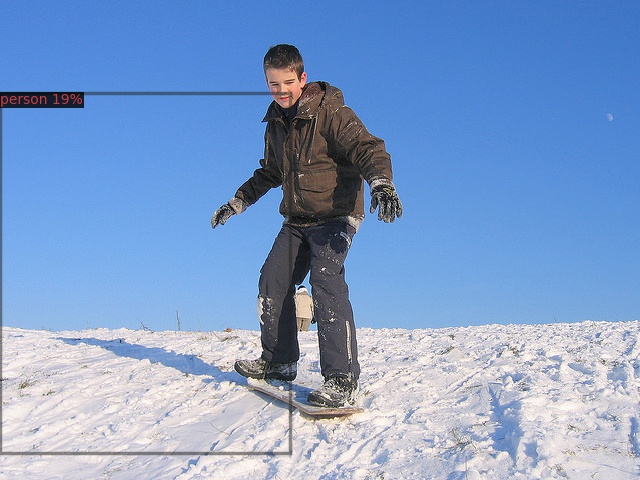

In [ ]:
from IPython.display import Image, display
display(Image('/content/example1.jpg'))